# Stationarity Testing and Time Series Decomposition

In [1]:
# basic imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import datetime as dt

# visualizations
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# settings
import warnings 
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [2]:
# Load in cleaned data:
cleaned_df = pd.read_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\cleaned_data.csv')

In [3]:
cleaned_df.head()

,order_id,date,item_code,quantity,unit_price,unit_cogs,country,item_name,style,name,group0,group1,group2,category,gender,age,sales_revenue,gross_profit,profit_margin
0,2000093388,2020-04-24,ZB00089178,1,5.829845,2.209302,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,5.829845,3.620543,0.621036
1,1900182328,2019-11-04,ZB00089178,1,5.686483,0.000000,Slovakia,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,5.686483,5.686483,1.000000
2,1900186164,2019-11-10,ZB00089178,1,4.965116,2.373643,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,4.965116,2.591473,0.521936
3,2000058563,2020-03-07,ZB00089178,1,4.965116,2.209302,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,4.965116,2.755814,0.555035
4,2000297106,2020-11-24,ZB00089178,1,4.772868,2.364341,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,4.772868,2.408527,0.504629


In [4]:
cleaned_df.dtypes

order_id           int64
date              object
item_code         object
quantity           int64
unit_price       float64
unit_cogs        float64
country           object
item_name         object
style             object
name              object
group0            object
group1            object
group2            object
category          object
gender            object
age               object
sales_revenue    float64
gross_profit     float64
profit_margin    float64
dtype: object

## Stationarity Testing

### Sales Revenue

In [5]:
# create revenue over time pandas series
sales_revenue = cleaned_df.groupby('date')['sales_revenue'].sum()

In [6]:
sales_revenue.head()

date
2019-06-01     4033.781335
2019-06-02       49.458527
2019-06-03     1323.282072
2019-06-04    68572.183865
2019-06-05    65144.273667
Name: sales_revenue, dtype: float64

In [7]:
sales_revenue.dtypes

dtype('float64')

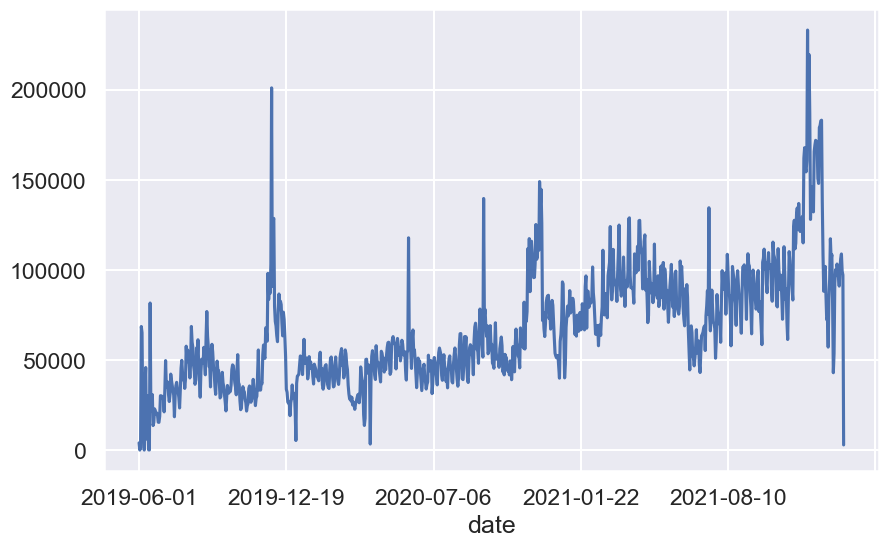

In [8]:
# set the figure size
plt.figure(figsize=(10, 6))

# plot the series
sales_revenue.plot()

# show the plot
plt.show()

Looking based of the plot we can classify the data as non-stationary

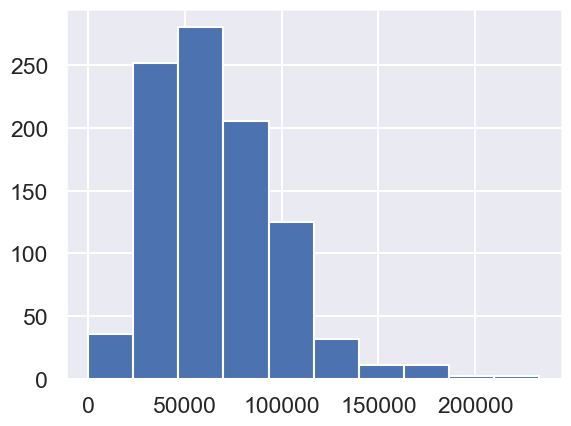

In [9]:
# create a histogram
sales_revenue.hist()
pyplot.show()

Running the plots a histogram of values from the time series. We clearly see the bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.

Next, we can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values.

In [10]:
X = sales_revenue.values
split = round(len(X) / 2) # splitting the data points into hald (365 / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

mean1=45184.39, mean2=88097.44
variance1=347636287.81, variance2=810858717.30


The mean and variance statistics also indicate that the revenue over time data is non-stationary, as they differ significantly.

#### Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

* Create a function `'ADF_Stationarity_Test'` with the input parameters `timeseries` and `significance_level` which: 
    * prints the adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)

In [11]:
# create ADF function:

def ADF_Stationarity_Test(timeseries, significance_level=0.05):
    """
    Perform Augmented Dickey-Fuller test to check stationarity of a time series
    
    Parameters
    ----------
    timeseries : array-like
        The time series to be tested for stationarity
    significance_level : float, optional
        The significance level for the ADF test. Default is 0.05.
    
    Returns
    -------
    None : prints the ADF test results and conclusion about the stationarity of the time series
    """
    # Perform ADF test
    result = adfuller(timeseries)
    
    # Print the ADF test results
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    # Check if the time series is stationary based on the p-value and significance level
    if result[1] <= significance_level:
        print(f'The time series is stationary at the {significance_level:.0%} significance level.')
    else:
        print(f'The time series is non-stationary at the {significance_level:.0%} significance level.')

In [12]:
# Apply the ADF_Stationarity_Test function to revenue_over_time series
ADF_Stationarity_Test(sales_revenue)

ADF Statistic: -3.3678157705950054
p-value: 0.012106199072657404
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
The time series is stationary at the 5% significance level.


However, when we conduct the ADF test, the results indicate that the series is stationary. This demonstrates how relying solely on simple plot analysis can be misleading. In this case, we will defer to the results of the ADF test.

## Time Series Functions


In [119]:
# force 'date' column to datetime object:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

In [120]:
def resample_series(series, time_period='day', measure='revenue'):
    
    time_periods = {'day': 'D', 'week': 'W', 'month': 'M', 'year': 'Y'}
    
    measures = {'revenue': 'sales_revenue', 'gross': 'gross_profit', 'margin': 'profit_margin'}
    
    series = series.set_index('date')[measures[measure]].resample(time_periods[time_period]).sum()
    series = pd.DataFrame(series).reset_index()
    
    return series

In [121]:
def create_date_features(timeseries_df):
    
    timeseries_df['year'] = timeseries_df['date'].dt.year
    timeseries_df['month'] = timeseries_df['date'].dt.month
    timeseries_df['day'] = timeseries_df['date'].dt.day
    timeseries_df['weekofyear'] = timeseries_df['date'].dt.isocalendar().week
    timeseries_df['weekday'] = timeseries_df['date'].dt.weekday + 1
    
    return timeseries_df

In [170]:
def add_lagged_features(timeseries_df, num_lag):
    
    for lag in range(1, num_lag+1):
        timeseries_df[f'lag_{lag}'] = timeseries_df.iloc[:,1].shift(lag)
    timeseries_df = timeseries_df.iloc[num_lag: , :]
    
    return timeseries_df

## Decomposition 

In [142]:
timeseries_df = resample_series(cleaned_df, 'day', 'revenue').set_index('date')

In [143]:
timeseries_df.head()

,sales_revenue
date,
2019-06-01,4033.781335
2019-06-02,49.458527
2019-06-03,1323.282072
2019-06-04,68572.183865
2019-06-05,65144.273667


In [144]:
timeseries_df.shape

(959, 1)

#### Additive Decomp

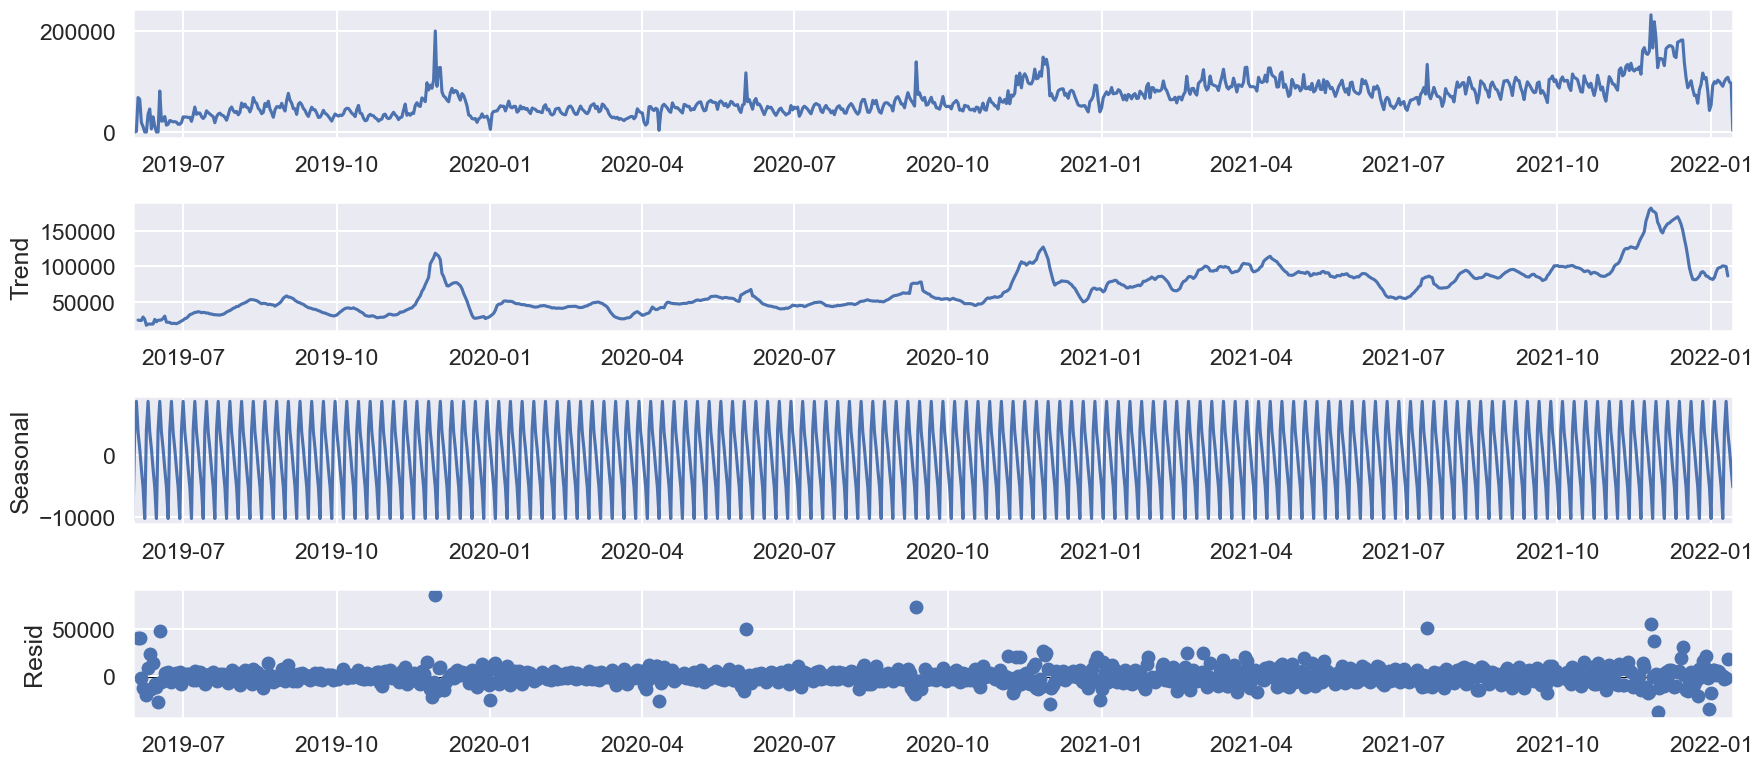

In [129]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(timeseries_df, model='additive')
fig = decomposition.plot()
plt.show()

We can see a slow and gradual increase in the trend line 

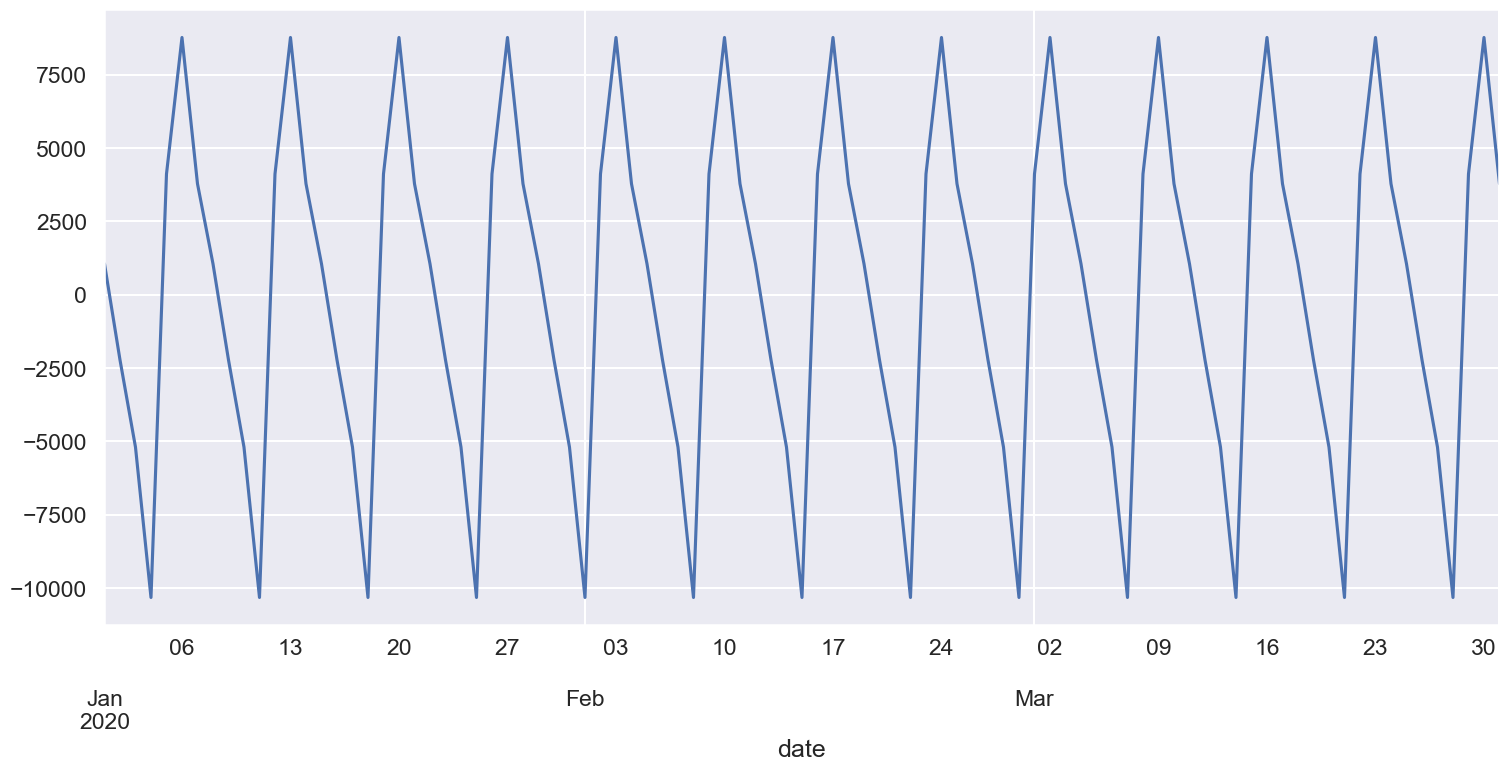

In [148]:
# show first quearter of 2020 for the seasonal decomposition:
decomposition.seasonal["2020":"2020-03"].plot();

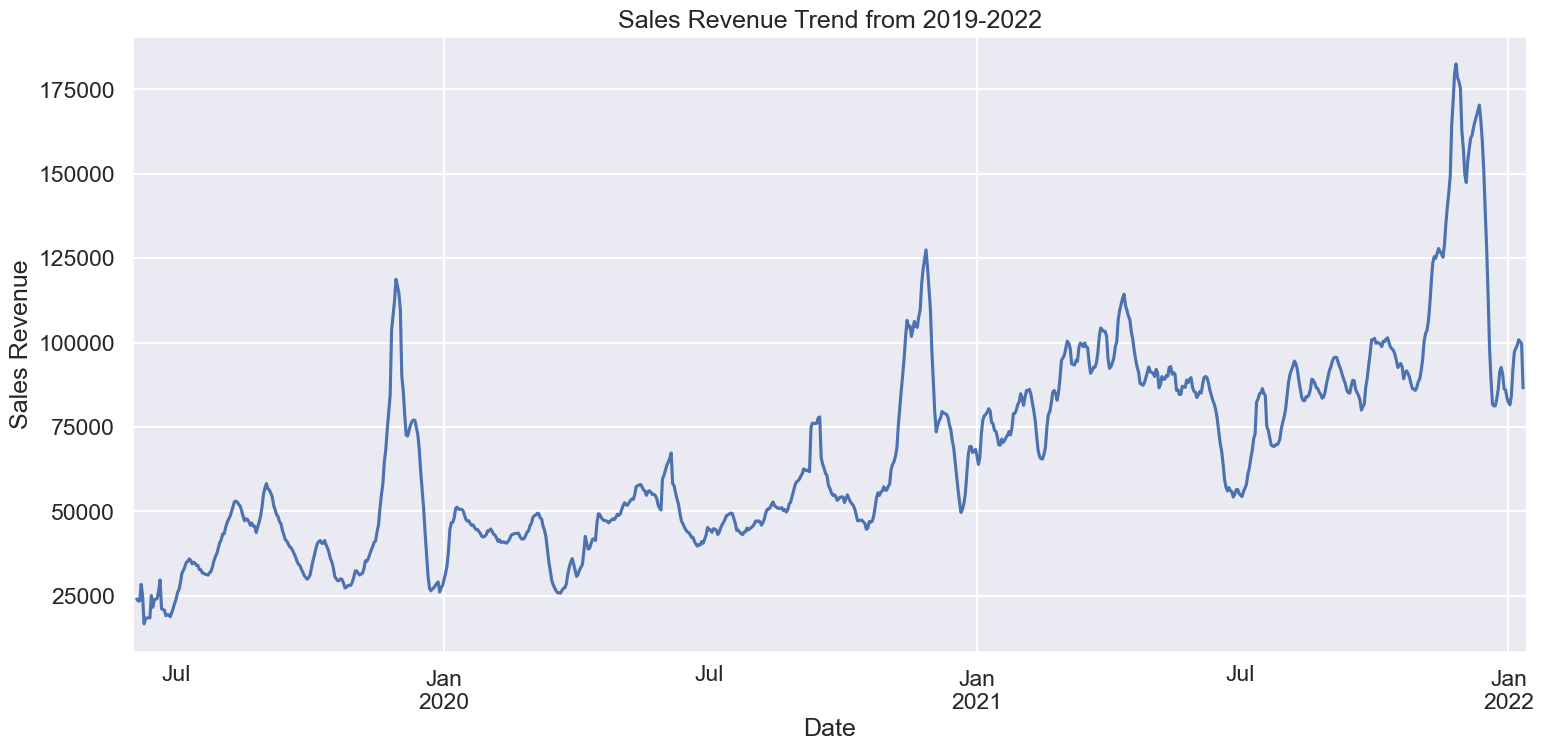

In [155]:
# plot revenue trend line for the past 4 years:
decomposition.trend.plot()
plt.title('Sales Revenue Trend from 2019-2022')
plt.ylabel('Sales Revenue')
plt.xlabel('Date')
plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/sales_revenue_trend.png')

#### Multiplicative Decomp

In [ ]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(timeseries_df, model='multiplicative')
fig = decomposition.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

Cannot use this multiplicative method since our series contains negative values therefore, we will use the additive method instead.

## Time Series Visualizations - Sales Revenue

In [174]:
timeseries_df = resample_series(cleaned_df, 'day', 'revenue')

In [175]:
timeseries_df.head()

,date,sales_revenue
0,2019-06-01,4033.781335
1,2019-06-02,49.458527
2,2019-06-03,1323.282072
3,2019-06-04,68572.183865
4,2019-06-05,65144.273667


In [189]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries = add_lagged_features(timeseries_df, 7)

In [192]:
# show lagged timeseries dataframe:
lag_timeseries.head()

,date,sales_revenue,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2019-06-08,37.927132,10750.820614,18783.094790,65144.273667,68572.183865,1323.282072,49.458527,4033.781335
8,2019-06-09,0.000000,37.927132,10750.820614,18783.094790,65144.273667,68572.183865,1323.282072,49.458527
9,2019-06-10,35543.475183,0.000000,37.927132,10750.820614,18783.094790,65144.273667,68572.183865,1323.282072
10,2019-06-11,45805.924673,35543.475183,0.000000,37.927132,10750.820614,18783.094790,65144.273667,68572.183865
11,2019-06-12,6162.000643,45805.924673,35543.475183,0.000000,37.927132,10750.820614,18783.094790,65144.273667
